In [79]:
from tools import analysistools as atools
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import os
import matplotlib as mpl

In [2]:
dfs = map(lambda x: os.path.join('/Volumes/LaCie/clus/rebuilds',x),filter(lambda x: 'out.csv' in x, os.listdir('/Volumes/LaCie/clus/rebuilds')))

In [46]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
(188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tab20 = [tuple([float(c)/255.0 for c in t]) for t in tableau20]

In [20]:
!pip install colour

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [61]:
from colour import Color
startColor = Color(rgb=tab20[4])
endColor= Color(rgb=tab20[8])


In [163]:
def plotRotationTrajectoryOnSphere(data,fig=plt.figure(figsize=(13, 13)),scol='red'):
    colors = []
    colStep = 1.0/float(len(data))
    colors = list(startColor.range_to(endColor,len(data)))
    colors = [c.rgb for c in colors]
    startPoint = 0
    X, Y, Z = zip(*data[startPoint:])
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X,Y,Z,alpha=0.6)
    ax.set_xlim([-4.0,4.0])
    ax.set_ylim([-4.0,4.0])
    ax.set_zlim([-4.0,4.0])
    # Hide grid lines
    ax.grid(False)
    plt.axis('off')
    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:200j]
    sx = 4.0*np.cos(u)*np.sin(v)
    sy = 4.0*np.sin(u)*np.sin(v)
    sz = 4.0*np.cos(v)
    ax.plot_wireframe(sx, sy, sz, color=scol,alpha=0.05)
    ax.scatter(X, Y, Z,c=colors[startPoint:],s=40)
    return fig

<Figure size 936x936 with 0 Axes>

/Volumes/LaCie/clus/rebuilds/246085_20200_0_out.csv


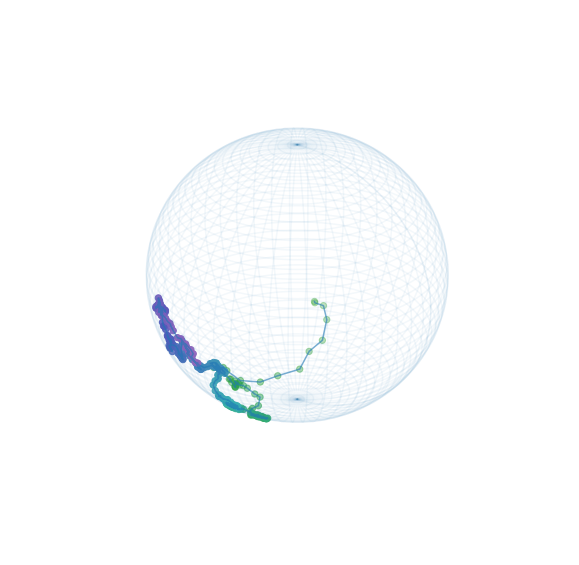

In [173]:
s = random.sample(dfs,1)[-1]
print s
df = pd.read_csv(s)
scol = tab20[0] if s.split('_')[1] != '-1' else tab20[2]
fig = plt.figure(figsize=(10, 10))
plotRotationTrajectoryOnSphere(atools.getRotationData(df),fig,scol=scol)
plt.show()

/Users/joelforster/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


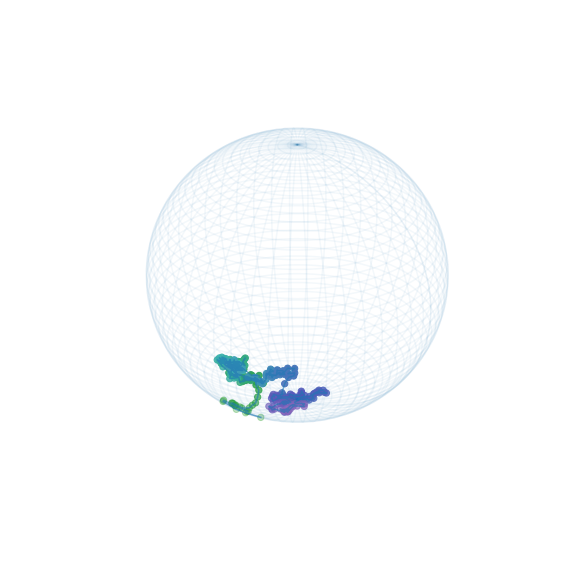

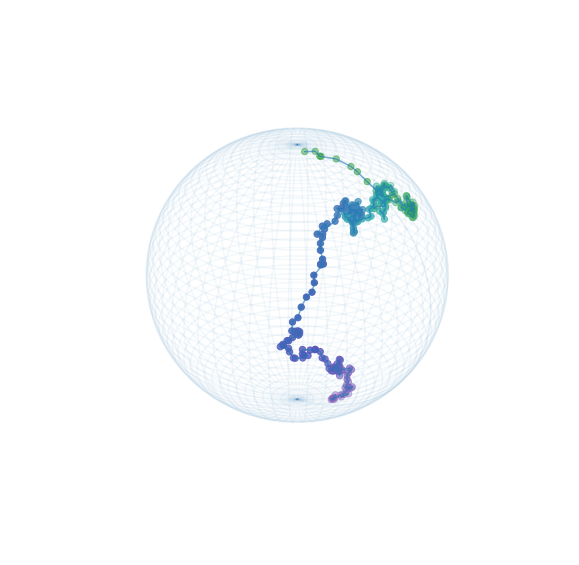

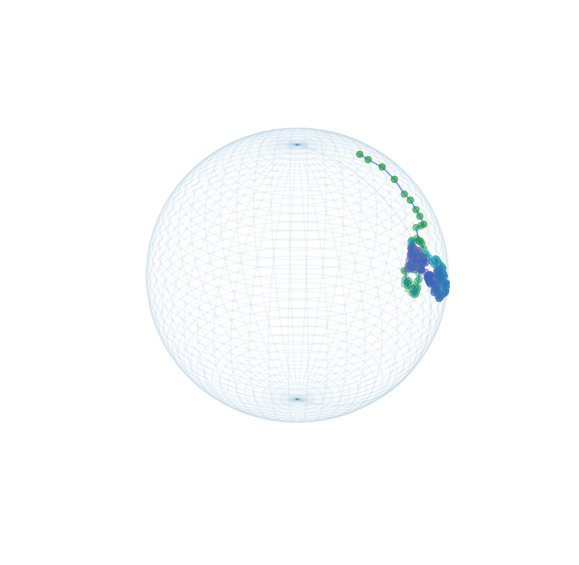

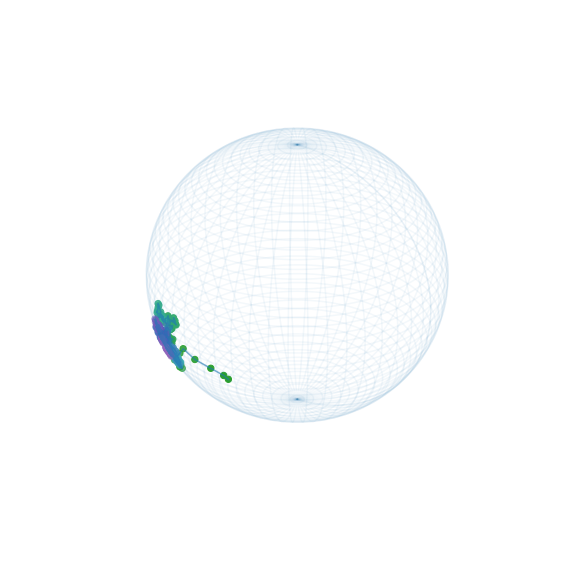

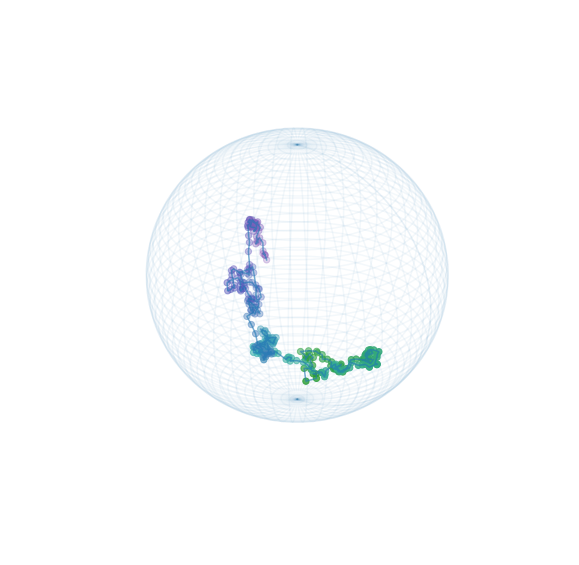

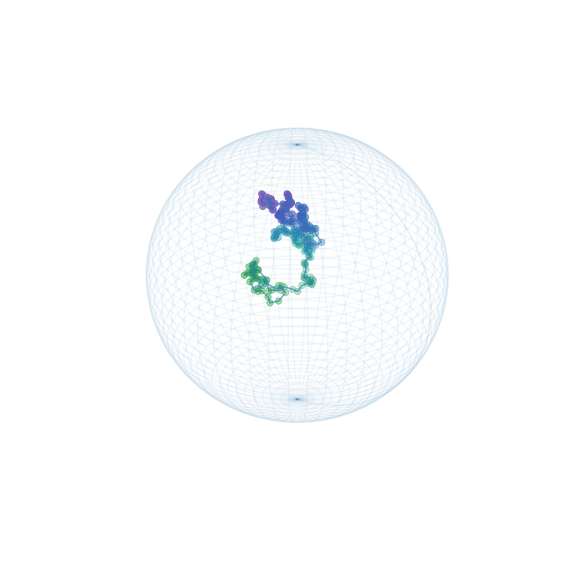

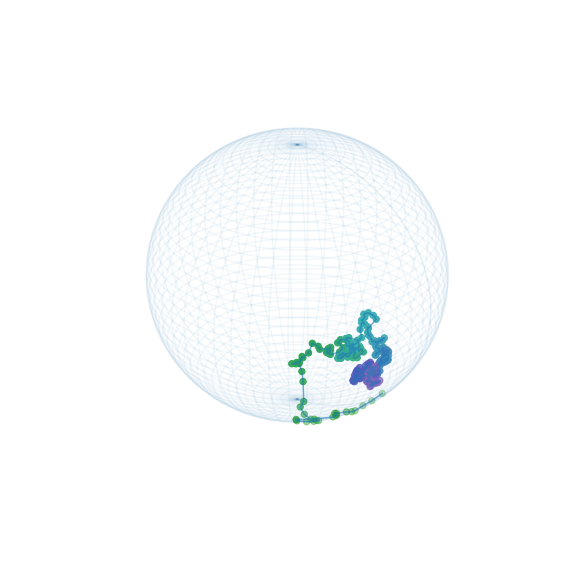

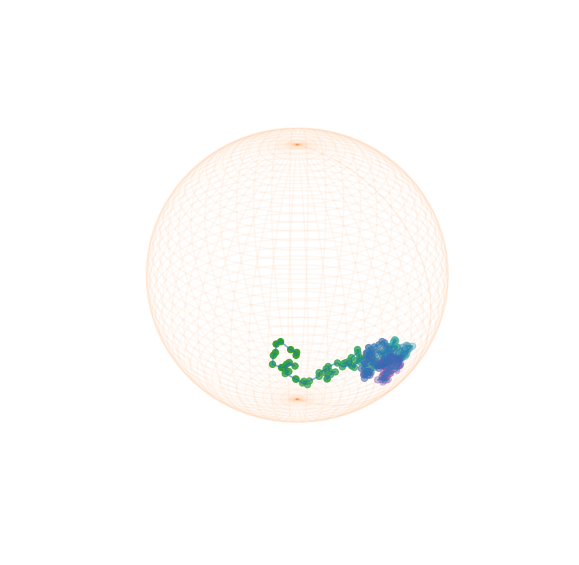

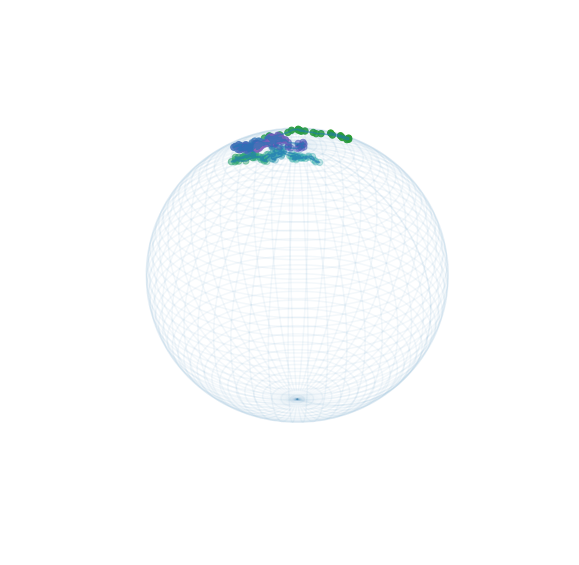

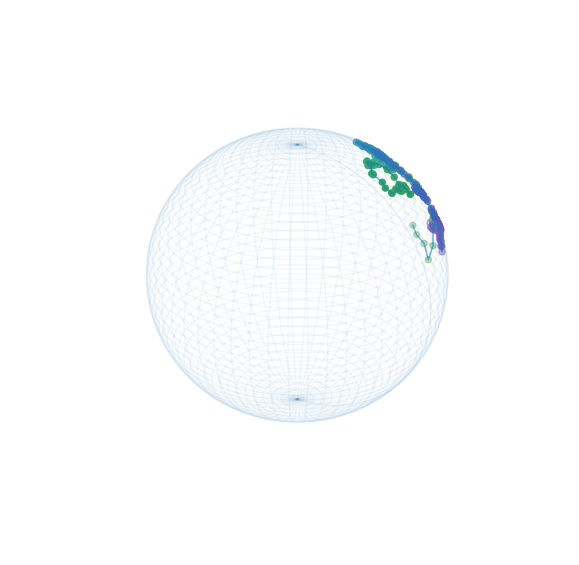

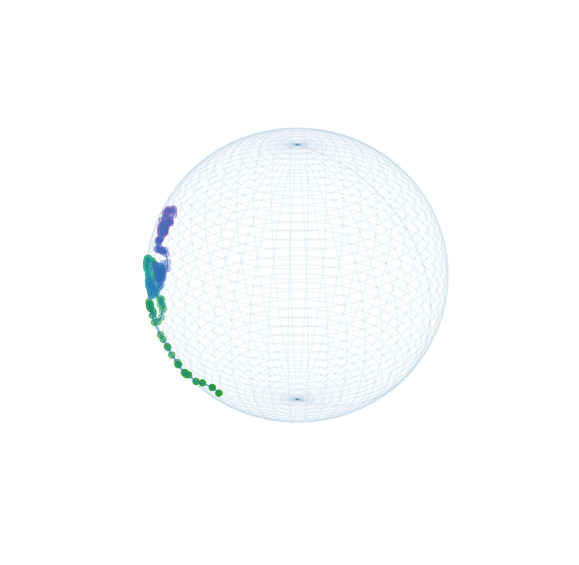

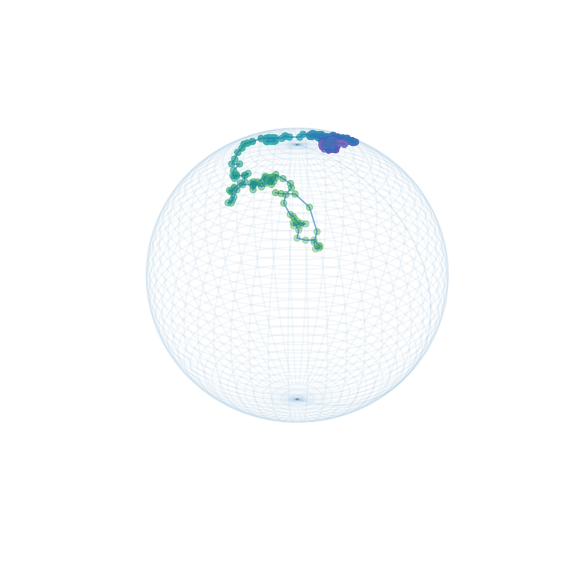

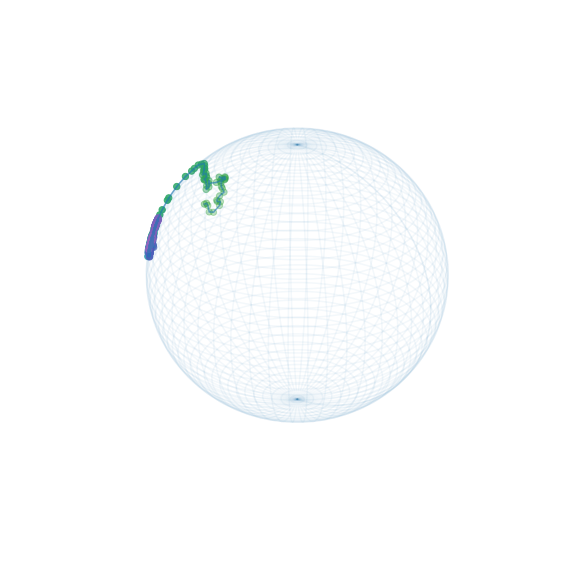

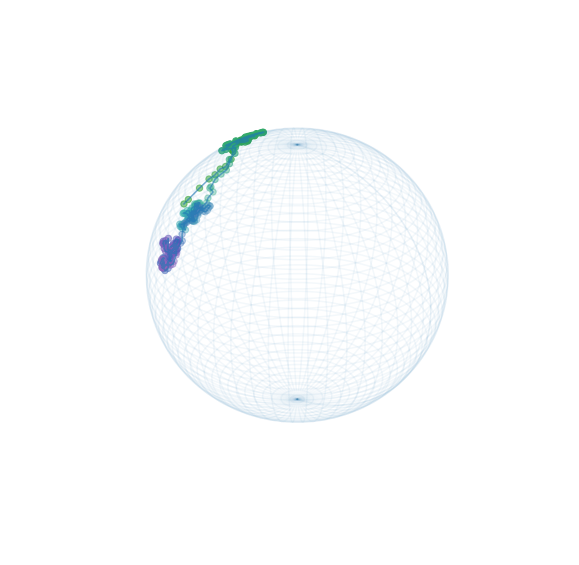

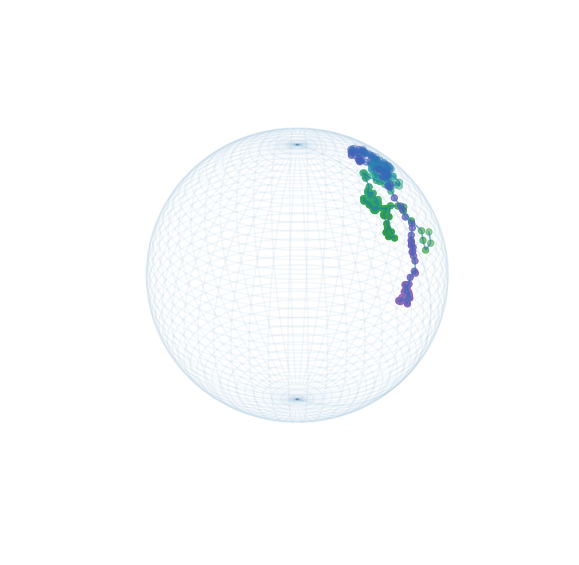

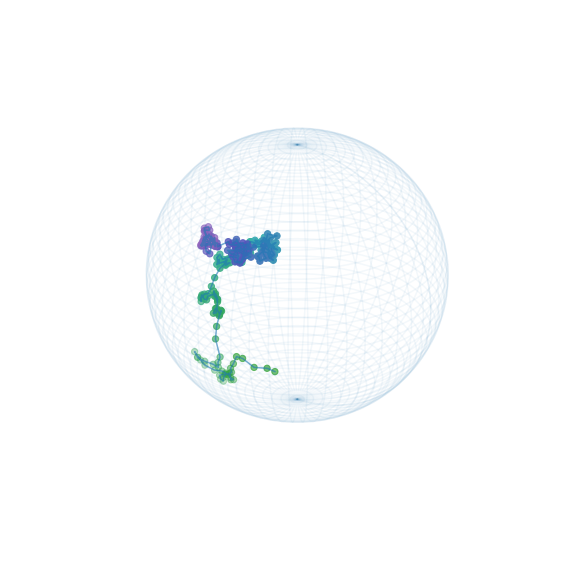

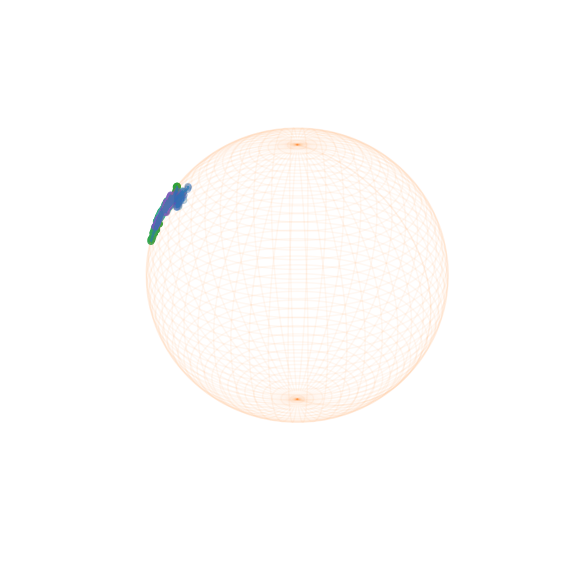

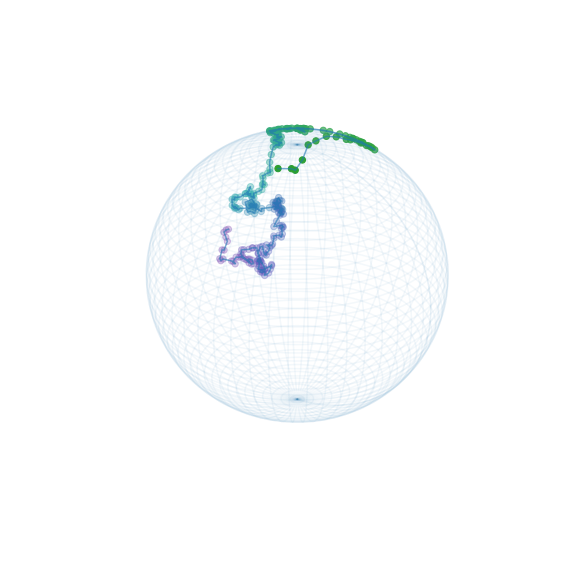

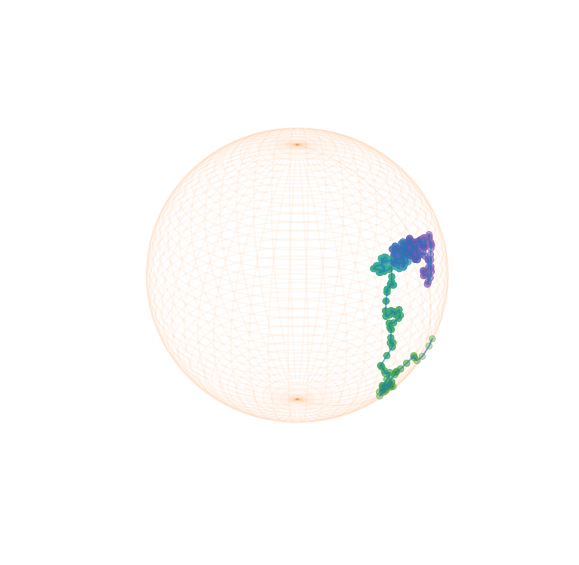

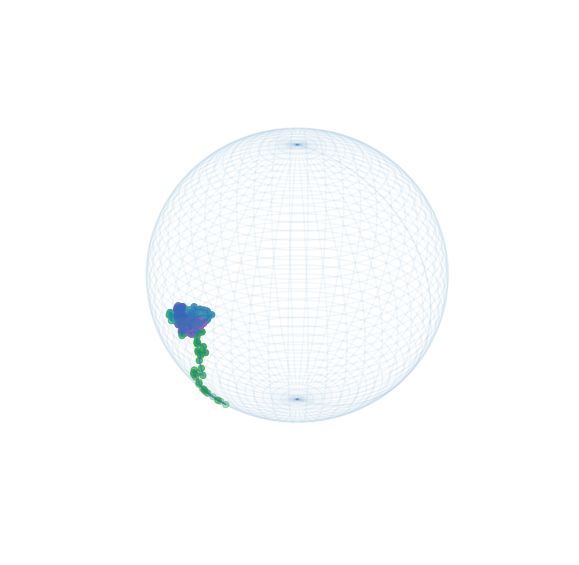

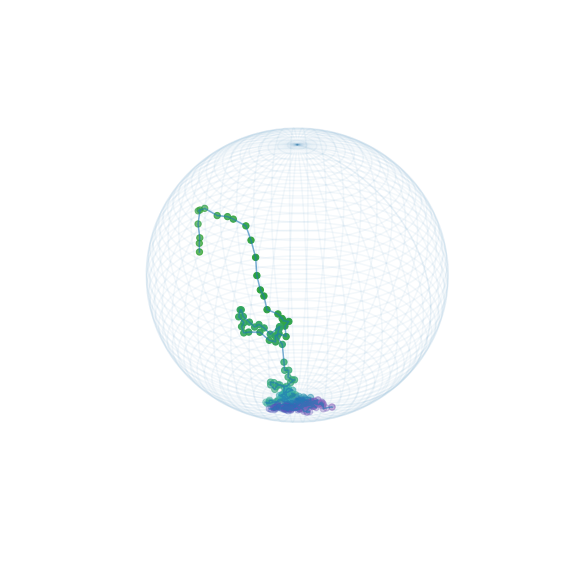

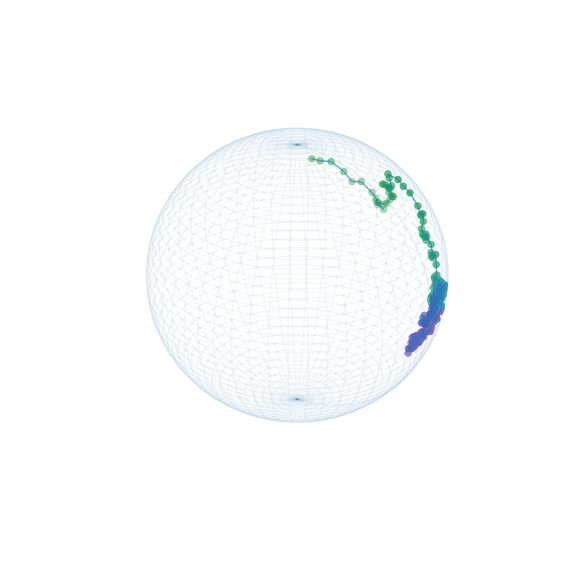

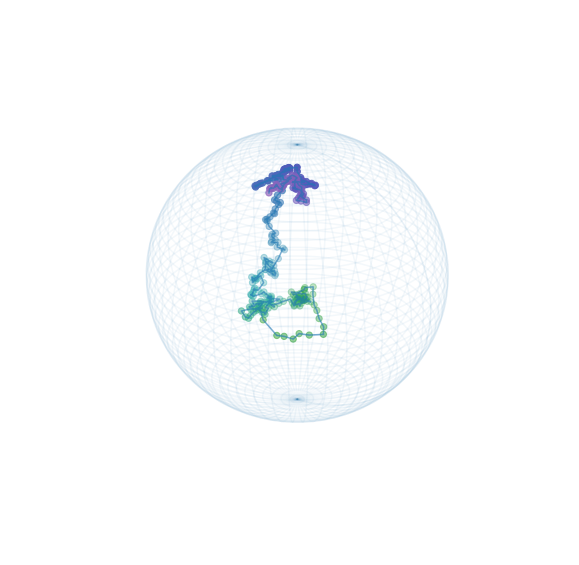

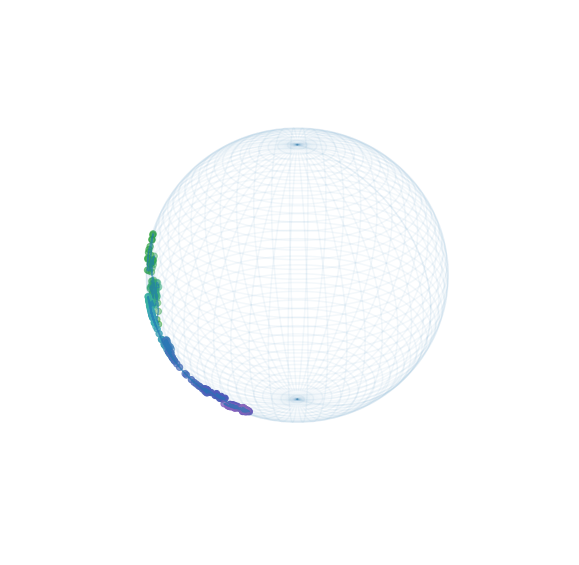

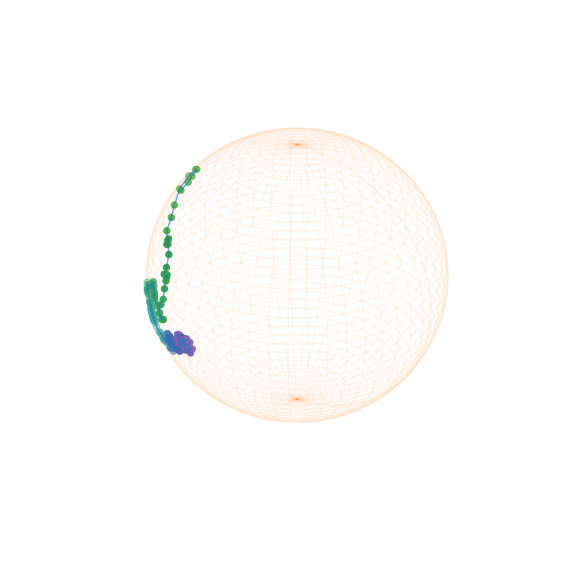

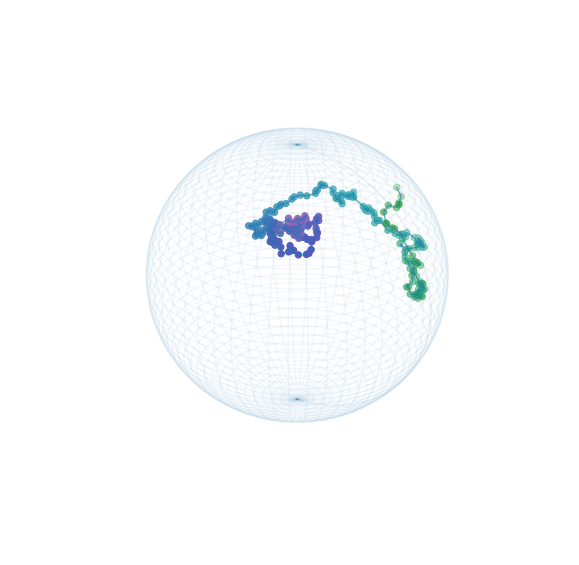

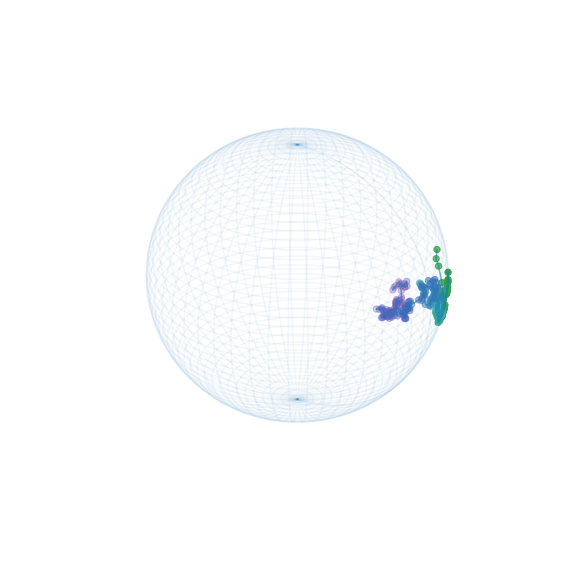

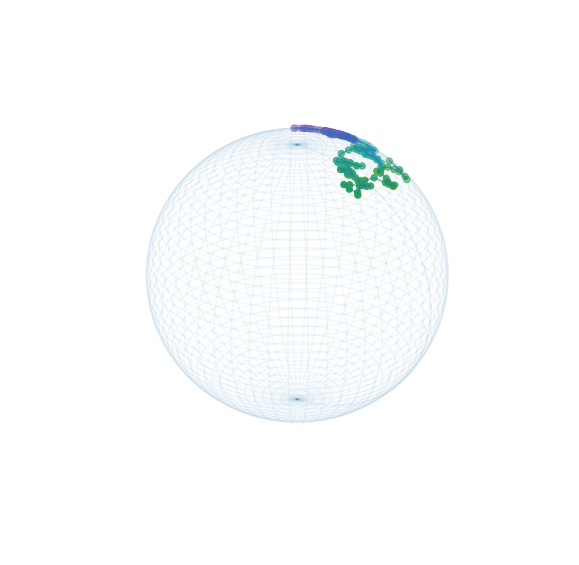

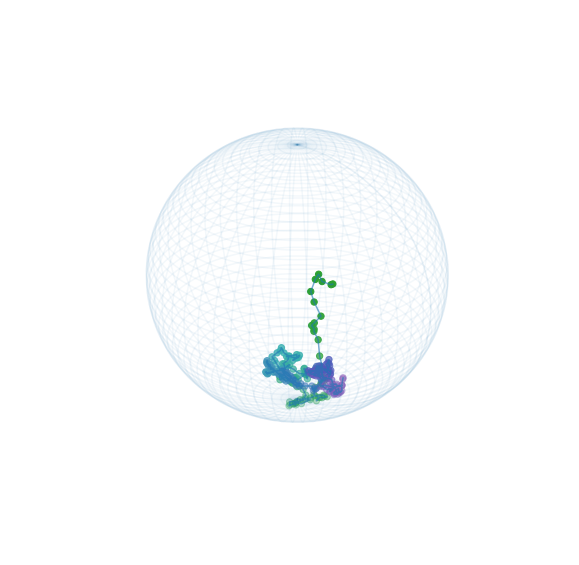

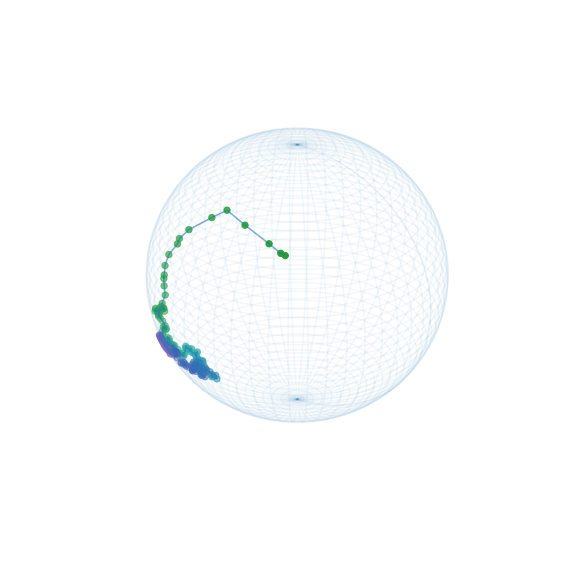

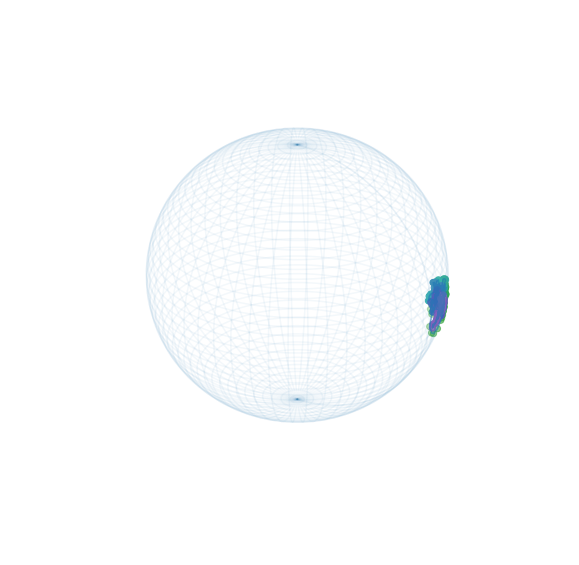

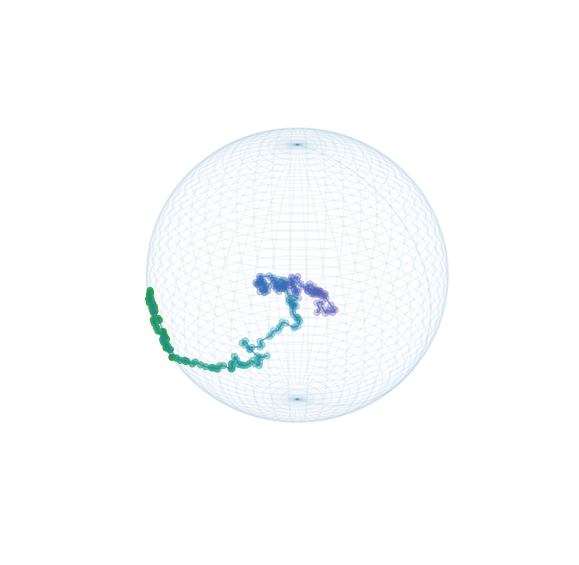

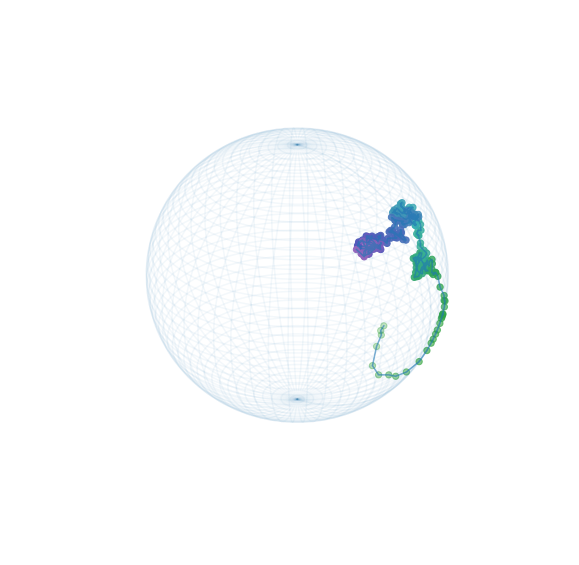

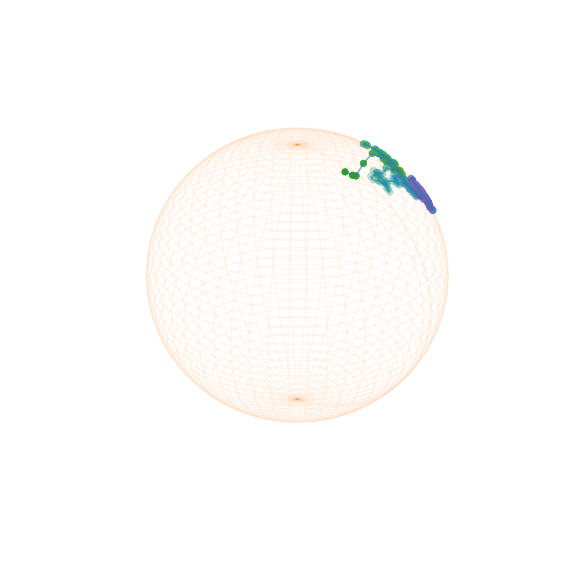

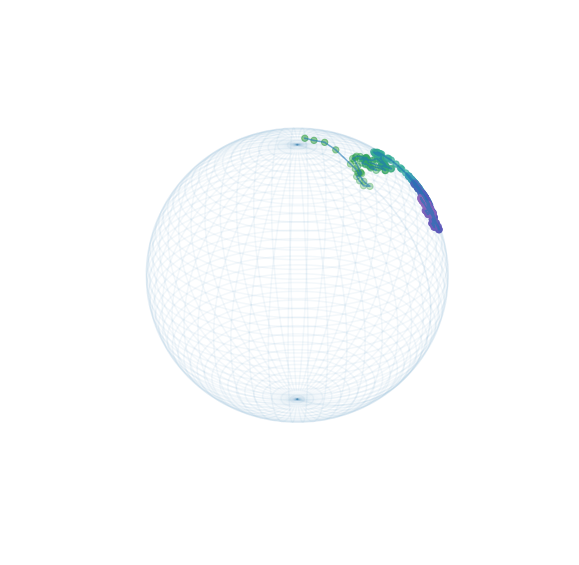

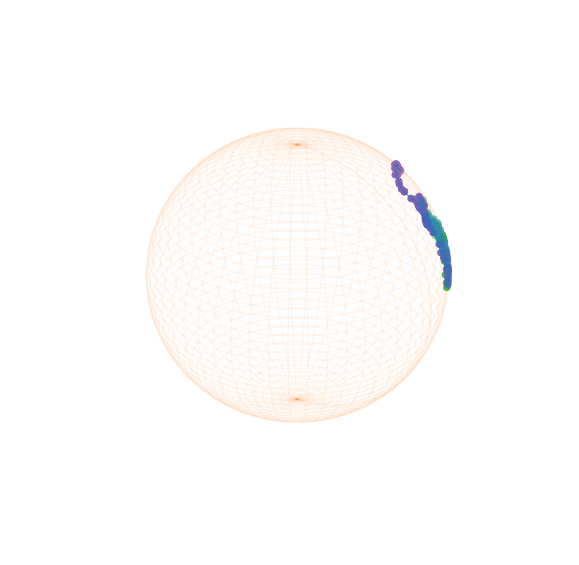

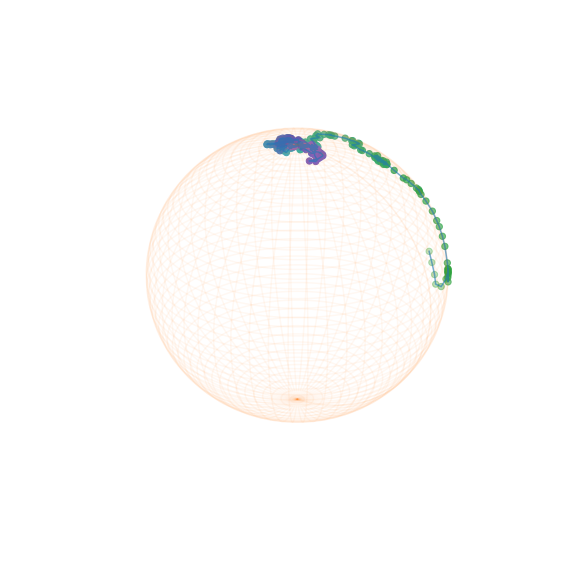

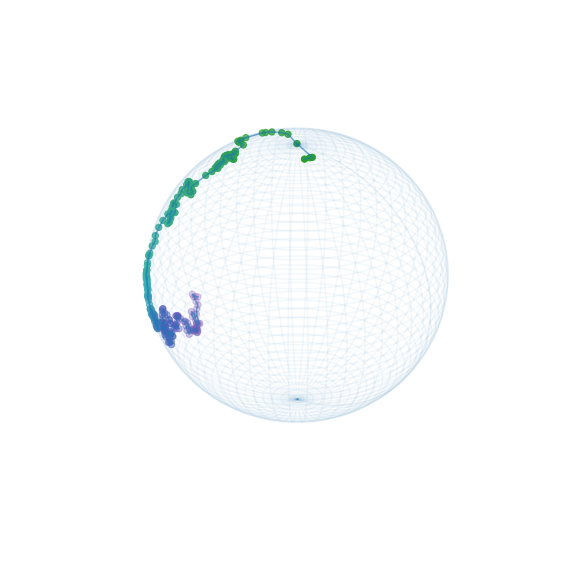

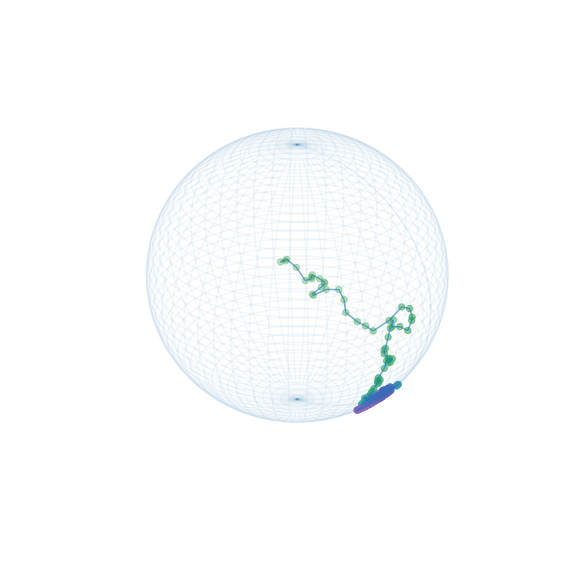

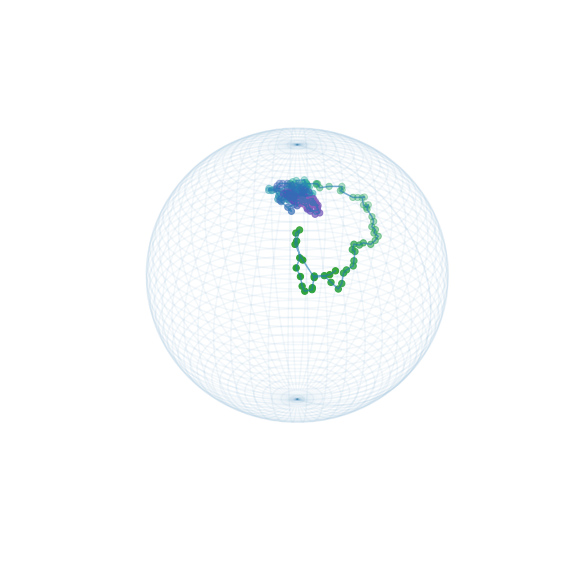

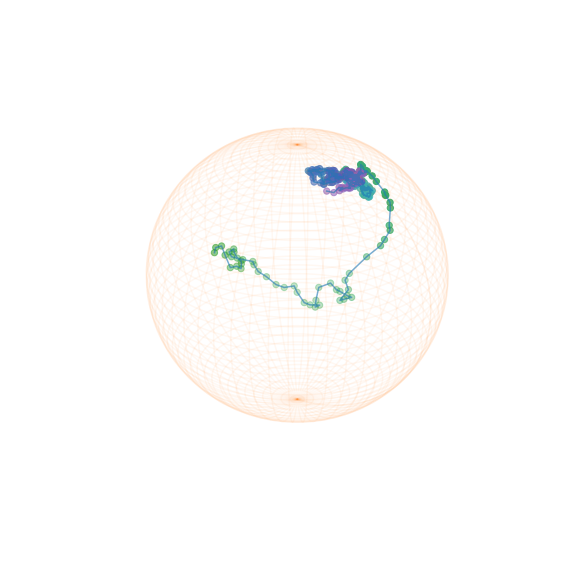

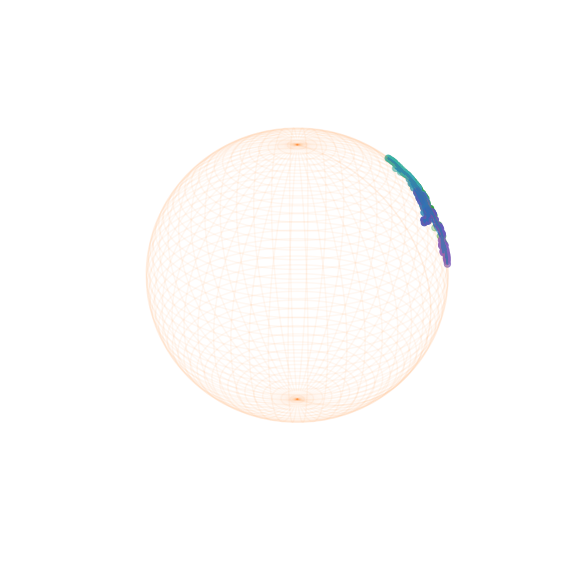

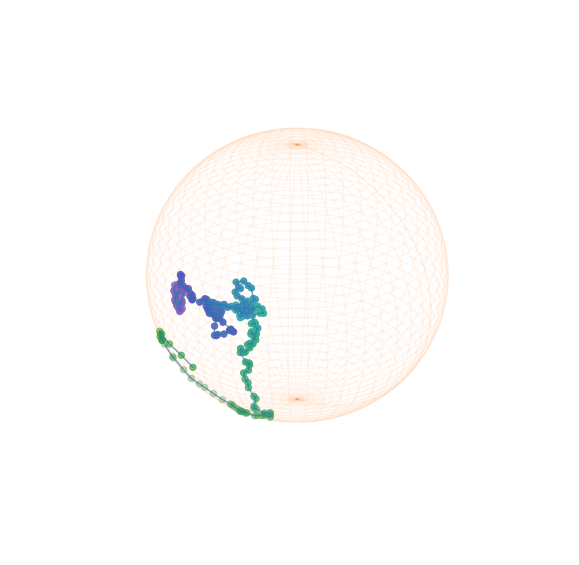

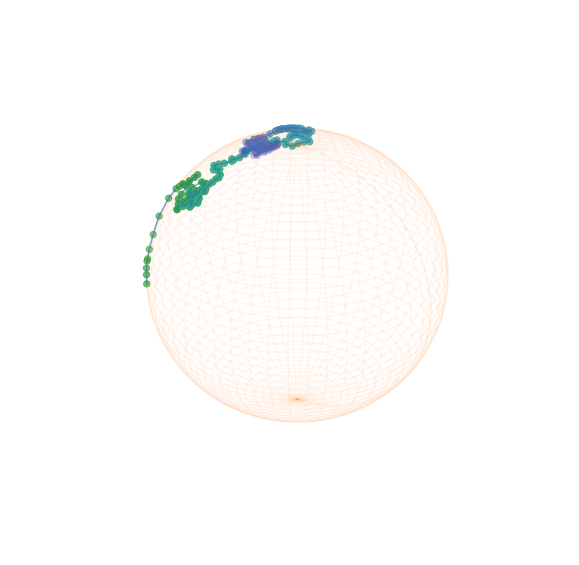

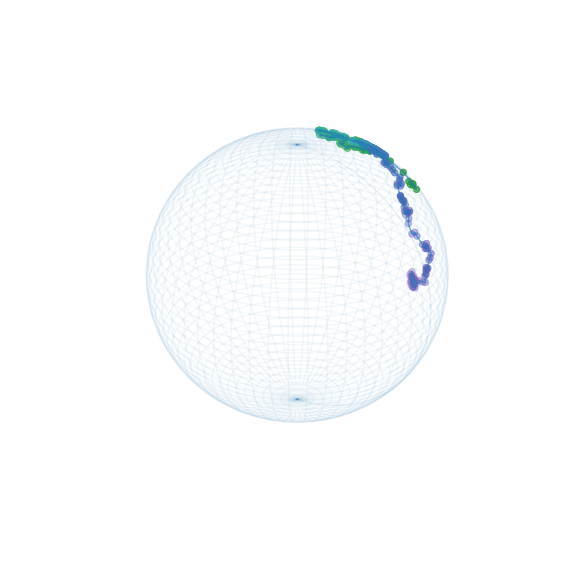

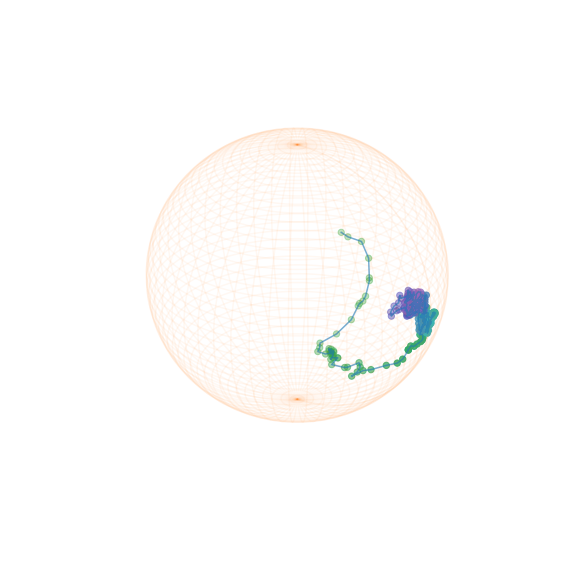

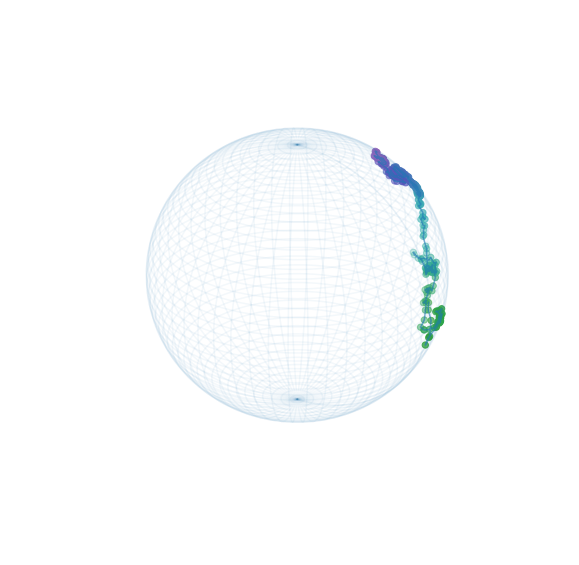

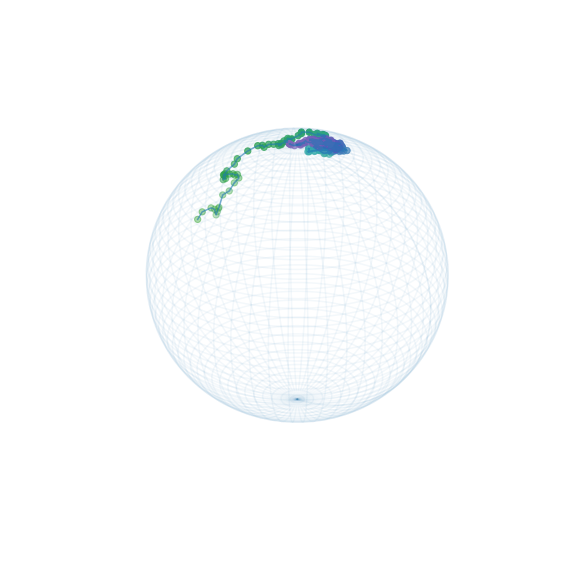

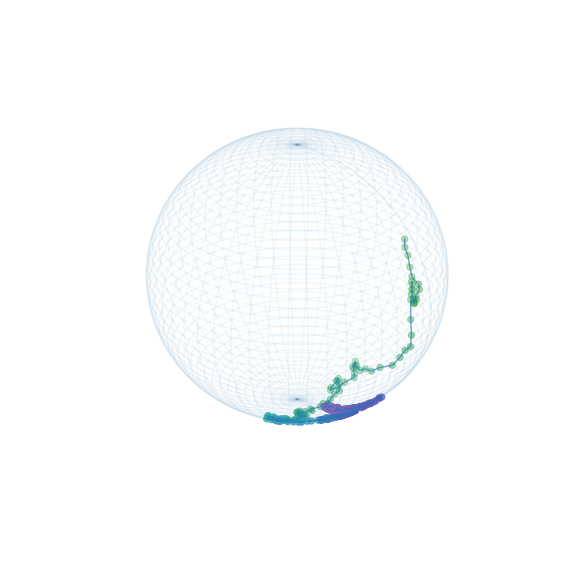

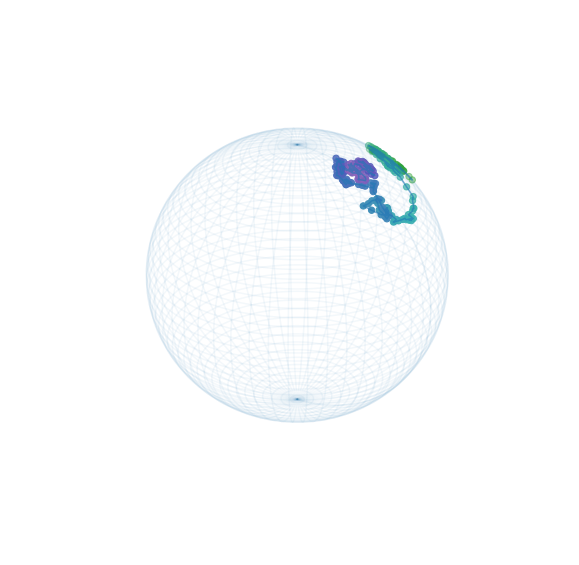

In [174]:
for i in range(50):
    s = random.sample(dfs,1)[-1]
    df = pd.read_csv(s)
    scol = tab20[0] if s.split('_')[1] != '-1' else tab20[2]
    t = 'bud' if scol==tab20[0] else 'nonbud'
    fig = plt.figure(figsize=(10, 10))
    plotRotationTrajectoryOnSphere(atools.getRotationData(df),fig,scol=scol)
    fig.savefig('/Volumes/LaCie/clus/traj/'+ str(t) +'_'+str(i)+'.png', format='png')

TypeError: unhashable type: 'list'

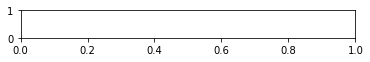

In [84]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()



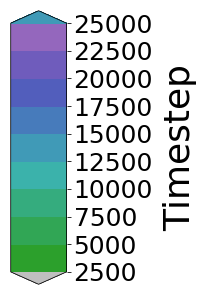

In [183]:
fig, ax = plt.subplots(figsize=(1, 10))
fig.subplots_adjust(bottom=0.5)
lcol=[c.rgb for c in list(startColor.range_to(endColor,100))]
cmap = mpl.colors.ListedColormap(lcol)
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [(i+1)*2500 for i in range(10)]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='vertical')
cb2.ax.set_yticklabels(bounds, fontsize=25)
cb2.set_label('Timestep',fontsize=36,labelpad=10)
fig.show()